In [2]:
import pandas as pd
from preprocessing_data import rolling_window, train_test_split_window, convert_date
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
 # Loading and preparing data
data_filtered_test = pd.read_csv("../database/venda_process/mensal/uf/oleodiesel/mensal_sp_oleodiesel.csv", sep=";",  parse_dates=['timestamp'], date_parser=convert_date)

/tmp/ipykernel_13912/271620117.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data_filtered_test = pd.read_csv("../database/venda_process/mensal/uf/oleodiesel/mensal_sp_oleodiesel.csv", sep=";",  parse_dates=['timestamp'], date_parser=convert_date)


In [4]:
data_filtered_test

,timestamp,m3
0,1990-01-01,592209.401
1,1990-02-01,479283.610
2,1990-03-01,442681.406
3,1990-04-01,581878.356
4,1990-05-01,552666.028
...,...,...
405,2023-10-01,1197246.395
406,2023-11-01,1171935.306
407,2023-12-01,1072537.466
408,2024-01-01,966387.502


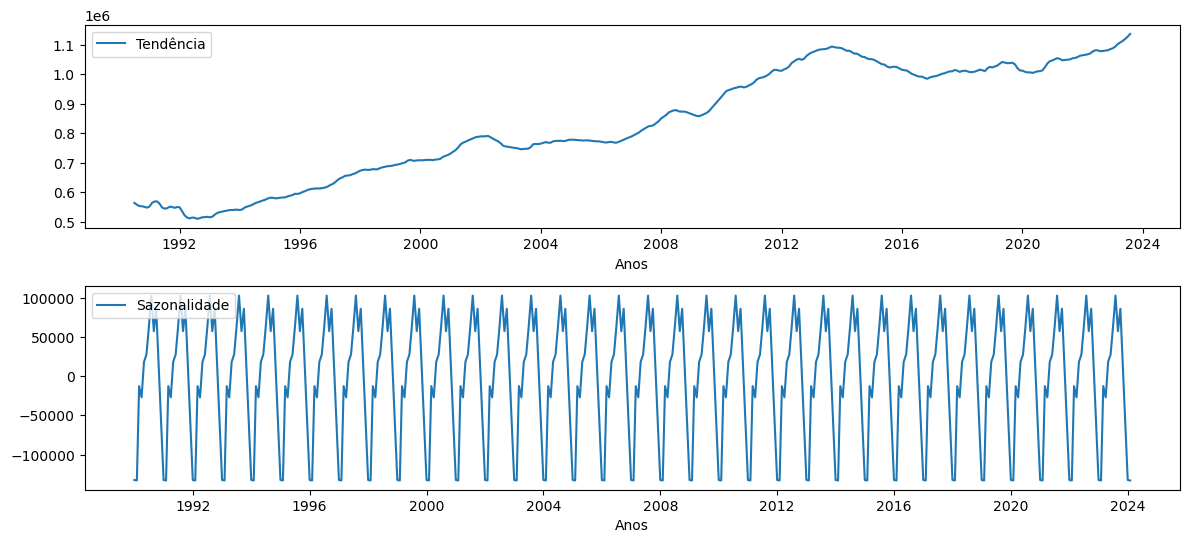

In [5]:
# Decomposição da série temporal
result = seasonal_decompose(data_filtered_test['m3'], model='additive', period=12)  # period=12 para sazonalidade mensal, ajuste conforme a periodicidade dos seus dados

# Gráfico de Decomposição
plt.figure(figsize=(12, 8))

# Tendência
plt.subplot(312)
plt.plot(data_filtered_test.timestamp, result.trend, label='Tendência')
plt.legend(loc='upper left')
plt.xlabel('Anos')

# Sazonalidade
plt.subplot(313)
plt.plot(data_filtered_test.timestamp, result.seasonal, label='Sazonalidade')
plt.legend(loc='upper left')
plt.xlabel('Anos')

plt.tight_layout()
plt.show()

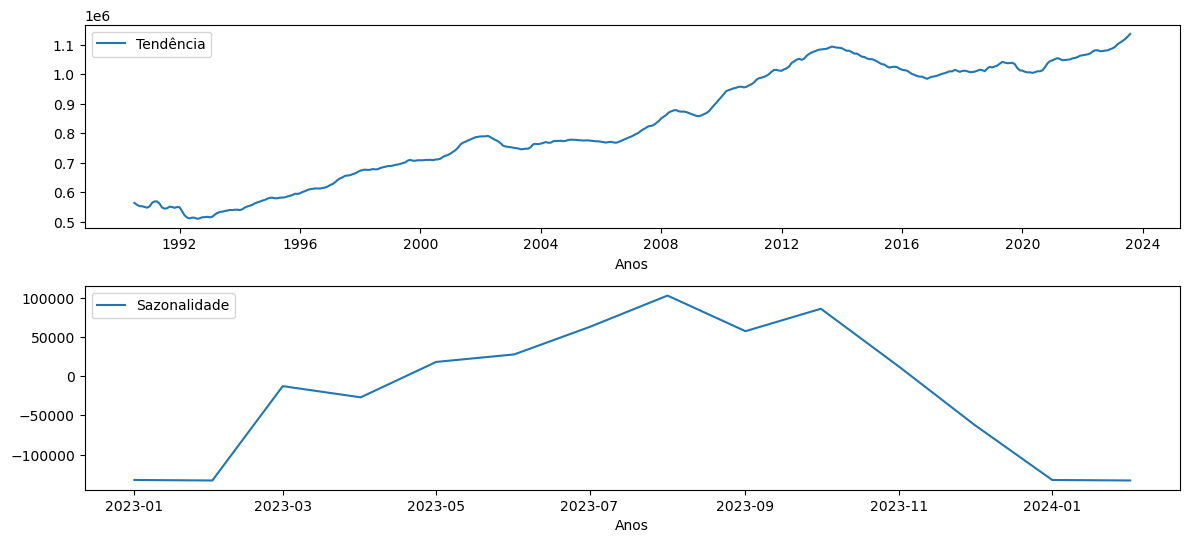

In [17]:
# Decomposição da série temporal
result = seasonal_decompose(data_filtered_test['m3'], model='additive', period=12)  # period=12 para sazonalidade mensal, ajuste conforme a periodicidade dos seus dados

# Gráfico de Decomposição
plt.figure(figsize=(12, 8))

# Tendência
plt.subplot(312)
plt.plot(data_filtered_test.timestamp, result.trend, label='Tendência')
plt.legend(loc='upper left')
plt.xlabel('Anos')

# Sazonalidade
plt.subplot(313)
plt.plot(data_filtered_test.timestamp[-14:], result.seasonal[-14:], label='Sazonalidade')
plt.legend(loc='upper left')
plt.xlabel('Anos')

plt.tight_layout()
plt.show()